<a href="https://colab.research.google.com/github/ojamoo/MLHeartDisease/blob/main/B1571798_MLProjectToPredictHeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is a Machine Learning project to predict Heart Disease in an individual**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Importing Required Libraries

In [2]:
url="https://raw.githubusercontent.com/ojamoo/MLHeartDisease/main/heart.csv"
#Loading the dataset that was downloaded from Kaggle and added to my Github repository

In [3]:
pd.set_option('display.max_rows',None)
df = pd.read_csv(url)

In [4]:
df.shape
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')

This dataset has 918 rows and 12 columns


In [5]:
df.head().style.set_properties(**{'background-color':'#FAEBD7'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Dataset do not have missing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
print(f"The Sex column has the unique values {df['Sex'].unique()}")
print(f"The ChestPainType column has the unique values {df['ChestPainType'].unique()}")
print(f"The RestingECG column has the unique values {df['RestingECG'].unique()}")
print(f"The ExerciseAngina column has the unique values {df['ExerciseAngina'].unique()}")
print(f"The ST_Slope column has the unique values {df['ST_Slope'].unique()}")

The Sex column has the unique values ['M' 'F']
The ChestPainType column has the unique values ['ATA' 'NAP' 'ASY' 'TA']
The RestingECG column has the unique values ['Normal' 'ST' 'LVH']
The ExerciseAngina column has the unique values ['N' 'Y']
The ST_Slope column has the unique values ['Up' 'Flat' 'Down']


In [10]:
data = pd.Series({'Age': 'age of the patient [years]',
'Sex': 'sex of the patient [M: Male, F: Female]',
'ChestPainType' : 'chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]',
'RestingBP': 'resting blood pressure [mm Hg]',
'Cholesterol': 'serum cholesterol [mm/dl]',
'FastingBS': 'fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]','RestingECG': 'resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes\' criteria]','MaxHR' : 'maximum heart rate achieved [Numeric value between 60 and 202]',
'ExerciseAngina' : 'exercise-induced angina [Y: Yes, N: No]','Oldpeak': 'oldpeak = ST [Numeric value measured in depression]',
'ST_Slope': 'the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]',
'HeartDisease' : 'output class [1: heart disease, 0: Normal]'})

datas = pd.DataFrame(data, columns = ['Description'])
print(datas.to_markdown(tablefmt="grid"))

+----------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                | Description                                                                                                                                                                                                                                |
+================+============================================================================================================================================================================================================================================+
| Age            | age of the patient [years]                                                                                                                                                                                           

All the dtype are matched to the corresponding heading

In [11]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Data Visualisation

In [12]:
df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


Plot bivariate histograms to show distributions of datasets. There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks.
The most common approach to visualizing a distribution is the histogram.
A histogram is a classic visualization tool where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar. It is the default approach in displot().

Text(0.5, 0.98, 'Ages distribution related to Heart Disease')

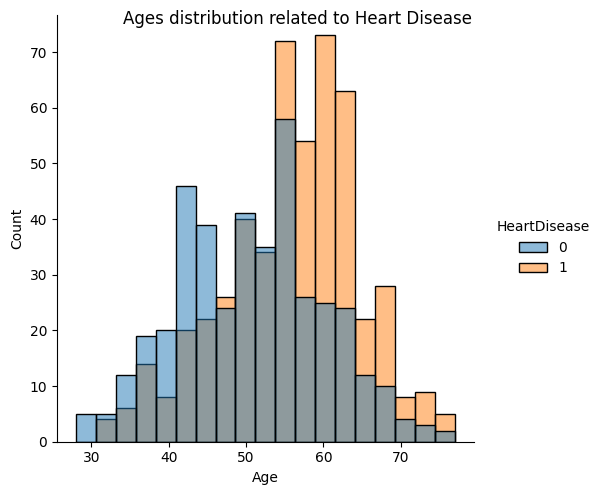

In [13]:
df_displot = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = df
)
df_displot.fig.suptitle('Ages distribution related to Heart Disease')

Age and heart disease are strongly correlated as the boxplot illustrates, it is more common in older people.

In [14]:
sex_counts = df["Sex"].value_counts(normalize=True).round(2) * 100
sex_counts = sex_counts.reset_index().rename(columns={"Sex": "Pct", "index": "Sex"})
sex_counts
#Counts of sex category

,Sex,Pct
0,M,79.0
1,F,21.0


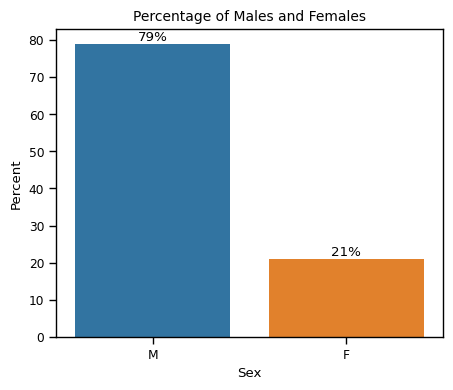

In [15]:
plt.figure(figsize=(5, 4))
sns.set_context("paper")



ax1 = sns.barplot(
    data=sex_counts,
    x="Sex",
    #errorbar=None,
    y="Pct",
)

values1 = ax1.containers[0].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[0], labels=labels)

ax1.set_ylabel("Percent")
ax1.set_xlabel("Sex")
ax1.set_title(
    "Percentage of Males and Females", fontsize=10
)


plt.show()

The data has more Males than Females which may cause a model skew

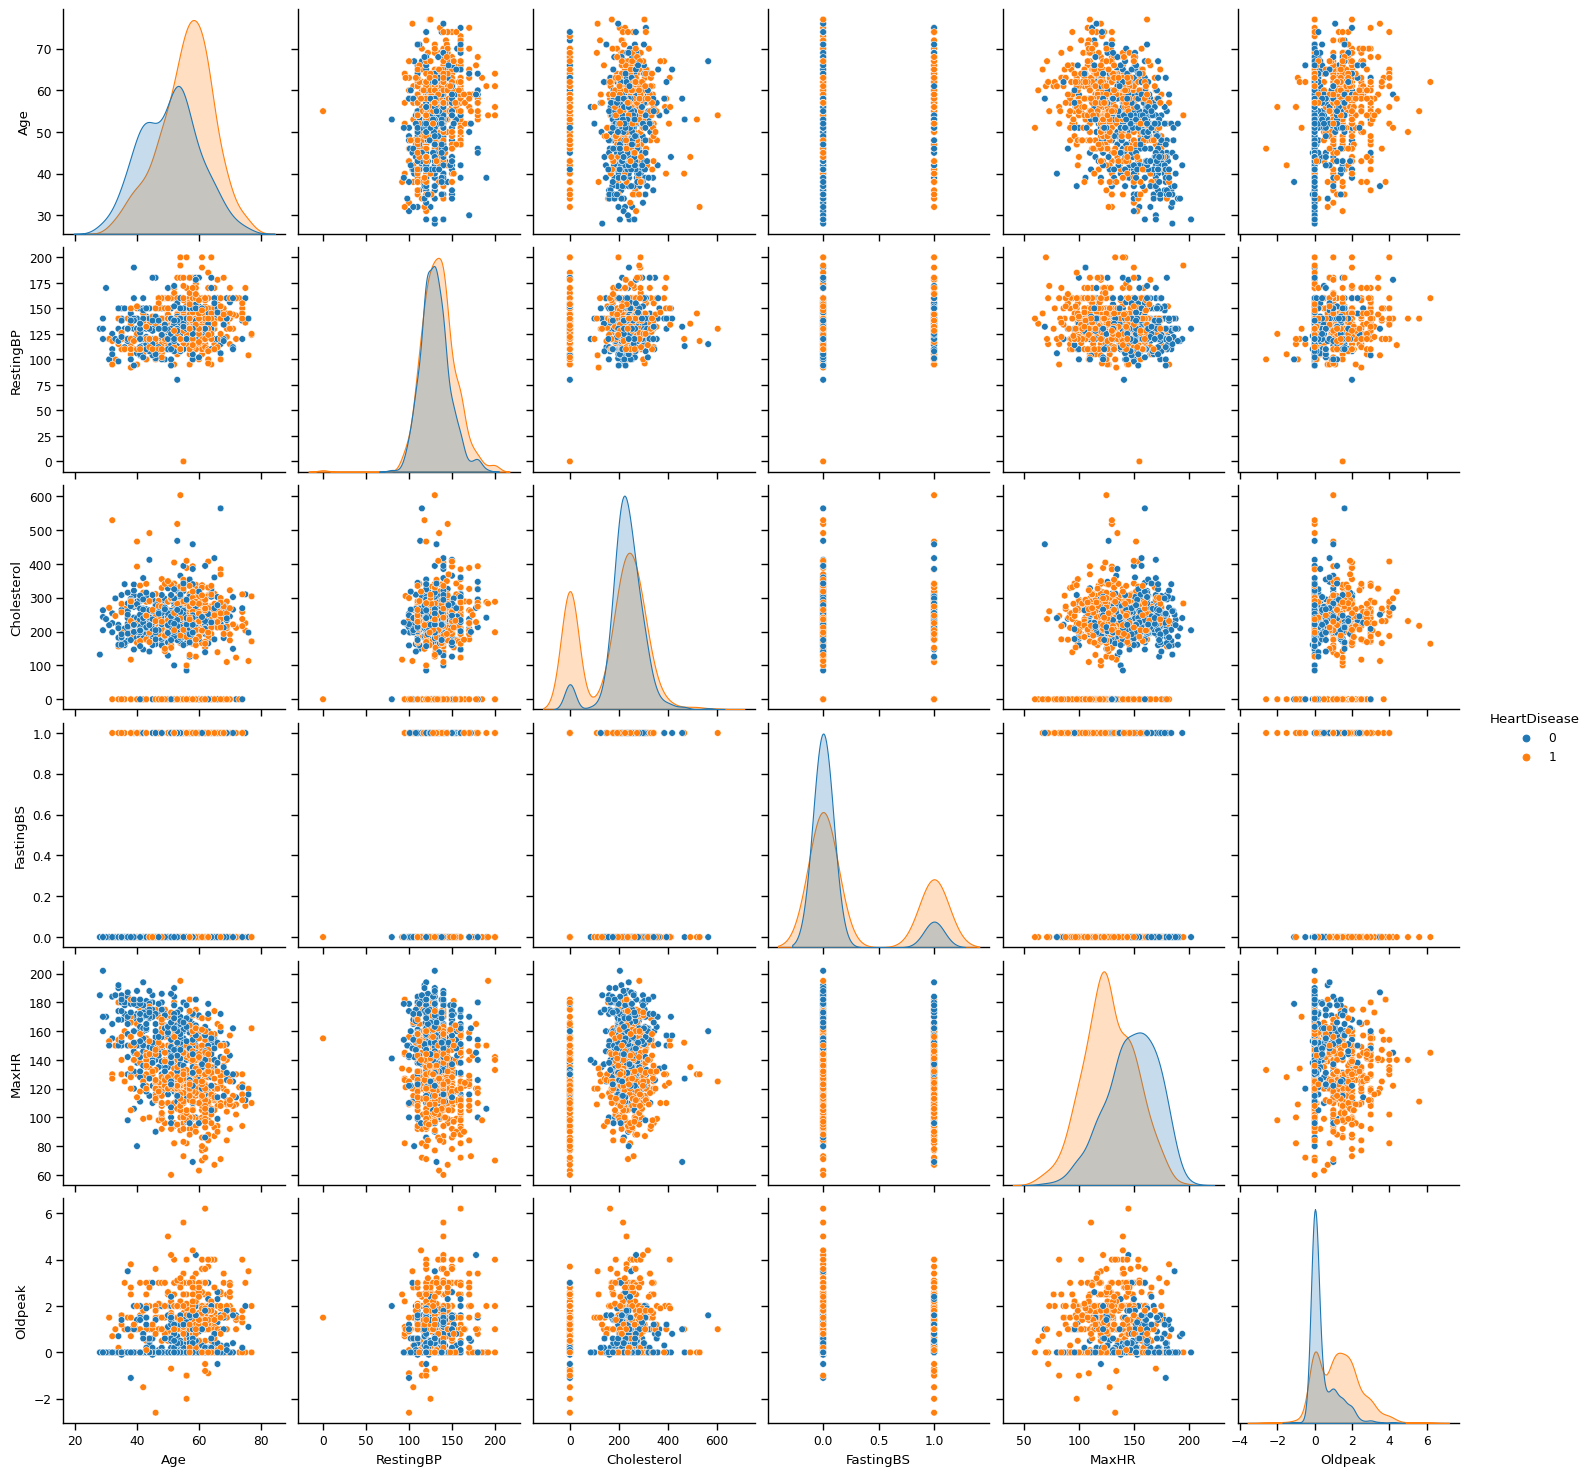

In [16]:
sns.pairplot(df, hue="HeartDisease")

<ipython-input-17-5ebe8d3e2a6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

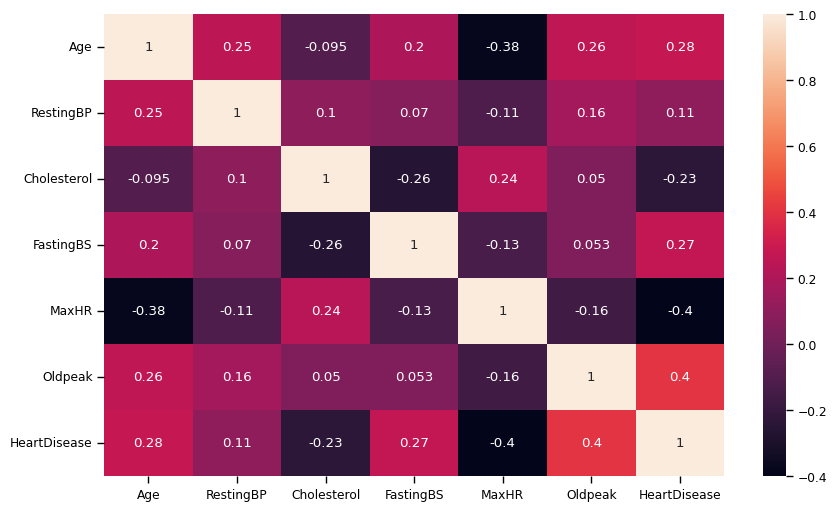

In [17]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

The diagram above displays the correlation between the variables. The pearson correlation coefficient ranges from -1 to +1 such that positive coefficient values closer to 1 indicate strong correlation (meaning that as one variable increases the other also increases) while negative coefficient values closer to -1 also indicate strong correlation but with a different interpretation (as one variable increases the other decreases).

Asides from the coefficients, the color is also indicative of correlation, so the darker the color the higher the correlation and vice versa. Therefore, from the diagram, it can be observed that there is an overall low to moderate degree of correlation between variables bearing positive coefficient values (especially considering the features,Age,RestingBP, fasting blood sugar and old peak to the label-heart disease). While Max heart rate has a negative-moderate correlation to heart disease. Age and MaxHR also have negative moderate correlation.

Text(0.5, 1.0, 'Age related to Heart Disease')

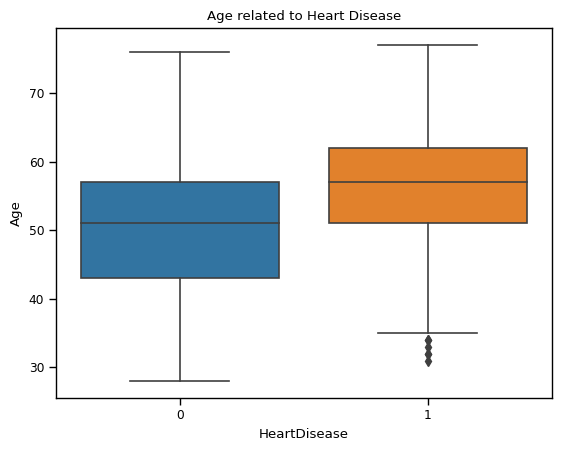

In [18]:
df_boxplot = sns.boxplot(
    data = df,
    x = 'HeartDisease',
    y = 'Age'
)
df_boxplot.set_title('Age related to Heart Disease')

Text(0.5, 1.0, 'RestingBP related to Heart Disease')

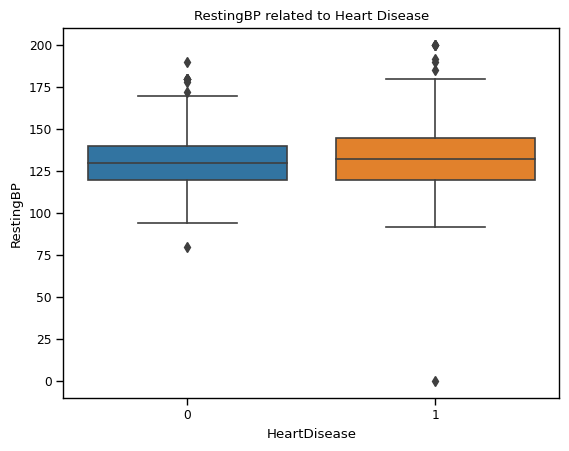

In [19]:
df_boxplot = sns.boxplot(
    data = df,
    x = 'HeartDisease',
    y = 'RestingBP'
)
df_boxplot.set_title('RestingBP related to Heart Disease')

Text(0.5, 1.0, 'Cholesterol related to Heart Disease')

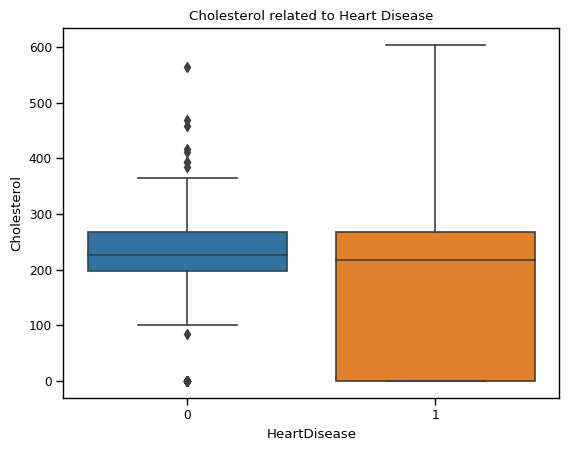

In [20]:
df_boxplot = sns.boxplot(
    data = df,
    x = 'HeartDisease',
    y = 'Cholesterol'
)
df_boxplot.set_title('Cholesterol related to Heart Disease')

Text(0.5, 1.0, 'FastingBS related to Heart Disease')

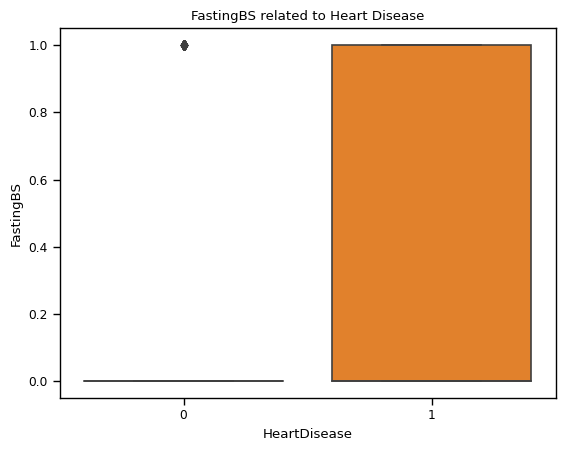

In [21]:
df_boxplot = sns.boxplot(
    data = df,
    x = 'HeartDisease',
    y = 'FastingBS'
)
df_boxplot.set_title('FastingBS related to Heart Disease')

Text(0.5, 1.0, 'MaxHR related to Heart Disease')

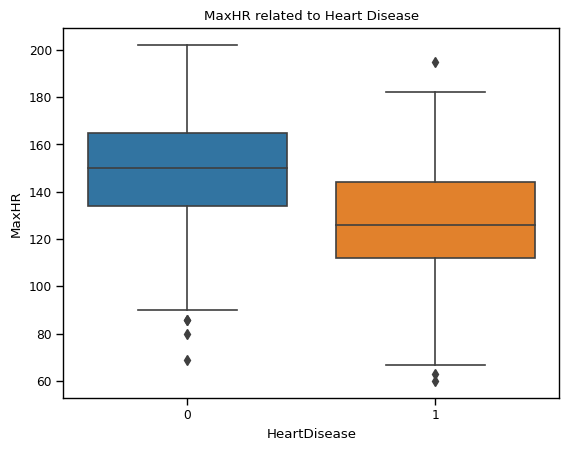

In [22]:
df_boxplot = sns.boxplot(
    data = df,
    x = 'HeartDisease',
    y = 'MaxHR'
)
df_boxplot.set_title('MaxHR related to Heart Disease')

Text(0.5, 1.0, 'Oldpeak related to Heart Disease')

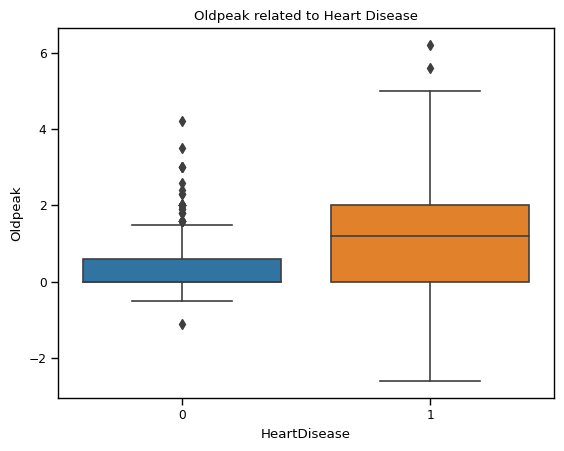

In [23]:
df_boxplot = sns.boxplot(
    data = df,
    x = 'HeartDisease',
    y = 'Oldpeak'
)
df_boxplot.set_title('Oldpeak related to Heart Disease')

From the boxplot display, the mean age and mean oldpeak for persons with heart disease was greater than those without heart disease. Hence, it could be inferred that as persons advance in age they are more likely to develop a heart disease while those who have had an oldpeak record also have an increased tendency to come down with a heart disease. in the fifth subplot however, heart disease was diagnosed in persons with lower Maximum heart rate. Therefore, indicating that as maximum heartrate decreases the probablity that a person develops a heart disease increases.

All the labels contained outliers while majority of persons with a fasting blood sugar higher than 120mg/dl were with a form of heart disease.

The cholesterol and Oldpeak subplots displayed negative skewness while MaxHR showed a positive skewness.Thus, indicating that majority of persons with heart disease had a cholesterol level of <200mg/dl(Medium-low risk), an oldpeak below 1.8 (low risk) and a MaxHR above 125(low-medium risk)

<Axes: xlabel='Age', ylabel='Count'>

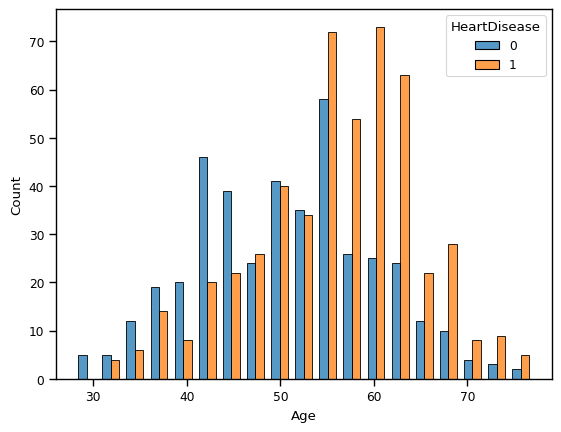

In [24]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='Age', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

<Axes: xlabel='Cholesterol', ylabel='Count'>

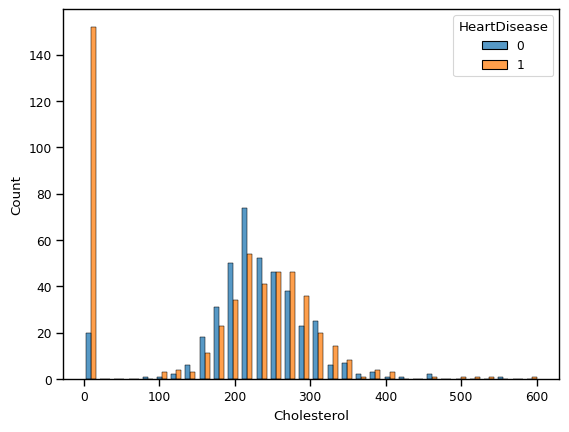

In [25]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='Cholesterol', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

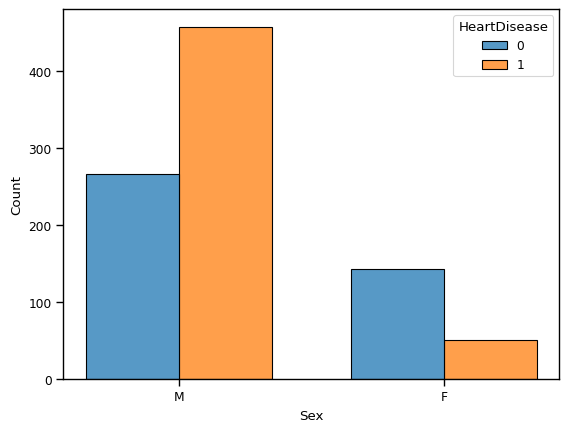

In [26]:
plt.subplot(1,1,1)
fig = sns.histplot(data = df, x ='Sex', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

In [27]:
df.groupby('HeartDisease')['Sex'].value_counts()

HeartDisease  Sex
0             M      267
              F      143
1             M      458
              F       50
Name: Sex, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='Count'>

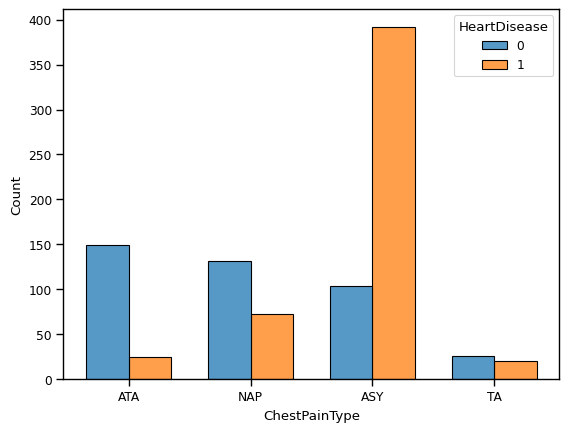

In [28]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='ChestPainType', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

In [29]:
df.groupby('HeartDisease')['ChestPainType'].value_counts()

HeartDisease  ChestPainType
0             ATA              149
              NAP              131
              ASY              104
              TA                26
1             ASY              392
              NAP               72
              ATA               24
              TA                20
Name: ChestPainType, dtype: int64

<Axes: xlabel='RestingECG', ylabel='Count'>

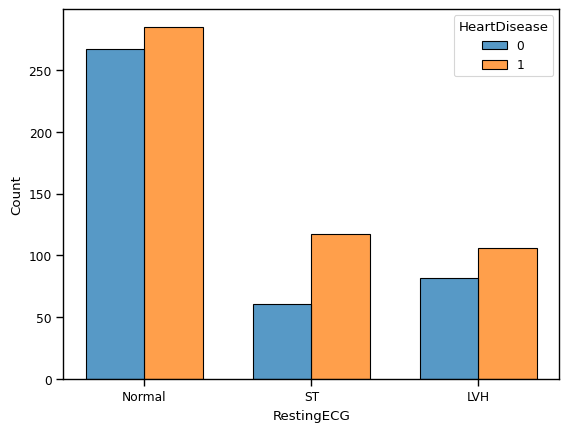

In [30]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='RestingECG', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

In [31]:
df.groupby('HeartDisease')['RestingECG'].value_counts()

HeartDisease  RestingECG
0             Normal        267
              LVH            82
              ST             61
1             Normal        285
              ST            117
              LVH           106
Name: RestingECG, dtype: int64

<Axes: xlabel='ExerciseAngina', ylabel='Count'>

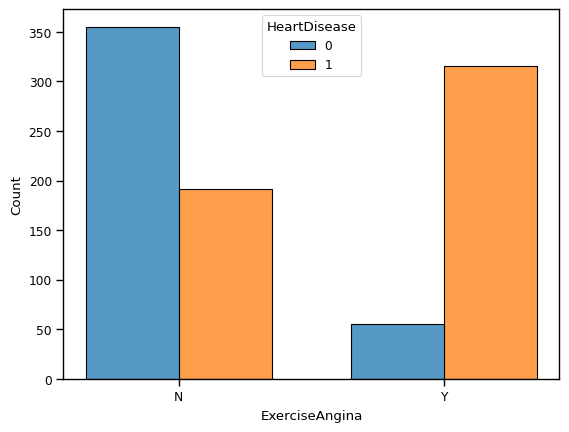

In [32]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='ExerciseAngina', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

In [33]:
df.groupby('HeartDisease')['ExerciseAngina'].value_counts()

HeartDisease  ExerciseAngina
0             N                 355
              Y                  55
1             Y                 316
              N                 192
Name: ExerciseAngina, dtype: int64

<Axes: xlabel='ST_Slope', ylabel='Count'>

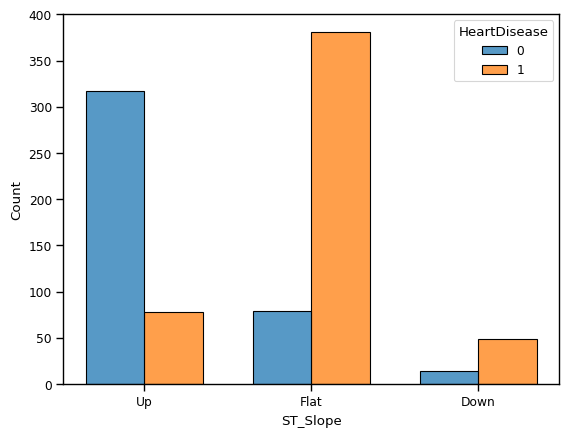

In [34]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='ST_Slope', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

In [35]:
df.groupby('HeartDisease')['ST_Slope'].value_counts()

HeartDisease  ST_Slope
0             Up          317
              Flat         79
              Down         14
1             Flat        381
              Up           78
              Down         49
Name: ST_Slope, dtype: int64

<Axes: xlabel='MaxHR', ylabel='Count'>

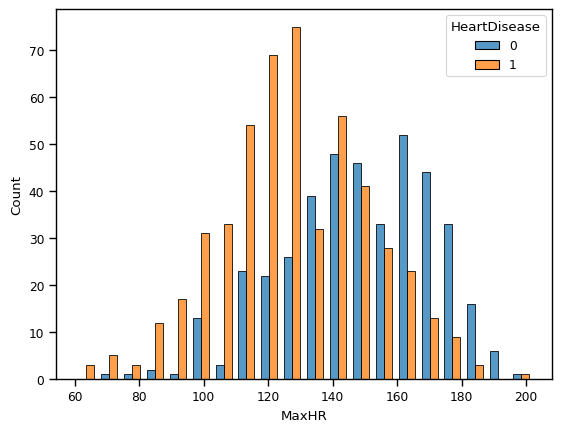

In [36]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='MaxHR', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

<Axes: xlabel='FastingBS', ylabel='Count'>

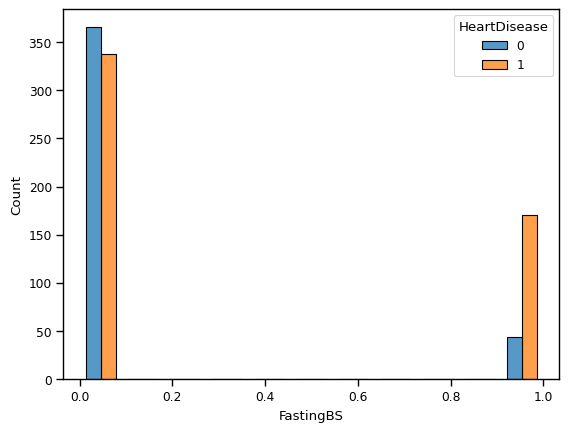

In [37]:
plt.subplot(1,1,1)
sns.histplot(data = df, x ='FastingBS', hue = 'HeartDisease', multiple="dodge", shrink=0.7)

In [38]:
df.groupby('HeartDisease')['FastingBS'].value_counts()

HeartDisease  FastingBS
0             0            366
              1             44
1             0            338
              1            170
Name: FastingBS, dtype: int64

The above plots


1. This plot shows us that more percentage of Males have heart failure than Females.
2. This plot shows us that when a greater percentage of heart dsease have asymptomatic pain while other pains may or maynot lead to heart disease.
3. Generally having a normal, ST or left ventricular hypertrophy is not a definite measure of Heart Disease thogh a greater percentage of ST abnormality wave have heart Disease.
4. Exercise Angina is pain gotten after exercising. We can see that most people that have this pain has heart Disease
5. The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] I can say from this visualization that an 'up' slope is the safest to have


In [39]:
categorical = [cat for cat in df.columns if df[cat].dtype == 'O']

In [40]:
df[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [41]:
numerical = [cat for cat in df.columns if df[cat].dtype != 'O']

In [42]:
df[numerical].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [43]:
new_df = df.copy()

In [44]:
new_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
#transforming categorical variables using the label encoding method
encode= ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for col in encode:
    new_df[col]=le.fit_transform(new_df[col])

new_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: >

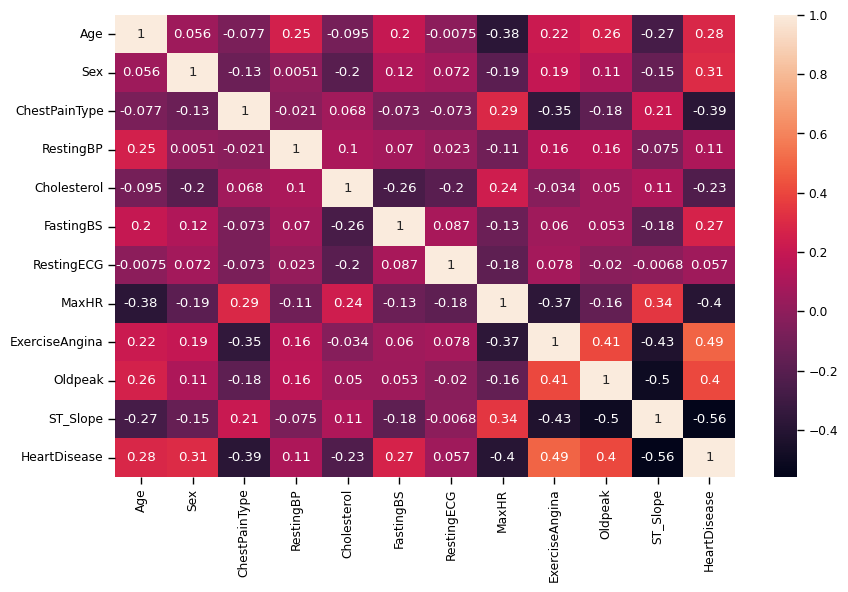

In [46]:
plt.figure(figsize = (10,6))
sns.heatmap(new_df.corr(),annot = True)

In [47]:
#IMPORTING MODELS AND NECESSARY LIBRARIES
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,roc_curve,ConfusionMatrixDisplay,classification_report,roc_auc_score,confusion_matrix

Scaler = MinMaxScaler()#for an appropriate scale

In [49]:
X = new_df.copy()
y= X.pop('HeartDisease')

In [50]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [51]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [52]:
# Splitting the Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=52)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 11)
(276, 11)
(642,)
(276,)


In [53]:
# Feature Scaling
X_train_Scaled= Scaler.fit_transform(X_train)
X_test_Scaled= Scaler.transform(X_test)
print("Size of Scaled training set:", X_train_Scaled.shape)
print("Size of Scaled testing set:", X_test_Scaled.shape)

Size of Scaled training set: (642, 11)
Size of Scaled testing set: (276, 11)


# Machine Learning Modelling

In [54]:
def ML(model, X_train = X_train_Scaled,X_test = X_test_Scaled,y_train = y_train,y_test = y_test):
    """
    This function takes in the type of model you want to run
    with an already defined X_train,X_test,y_train and y_test then
    gives the accuracy, confusion matrix and classification report

    """
    model.fit(X_train_Scaled, y_train)
    y_pred_test = model.predict(X_test_Scaled)
    print('Accuracy score of this model : ', accuracy_score(y_test, y_pred_test))
    cm =confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    print(classification_report(y_test, y_pred_test))

In [55]:
def AUC_curve(model,y_test = y_test, X_test = X_test_Scaled):
    """
    This function shows  the AUC_curve and score of an a
    already trained model

    """
    y_pred1 = model.predict_proba(X_test_Scaled)[:,1]
    y_pred0 = model.predict_proba(X_test_Scaled)[:,0]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    plt.figure(figsize = (7,6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], '--')
    plt.title('ROC curve for Heart Failure classifier')
    plt.xlabel('False positive rate')
    plt.ylabel('True positve rate')
    plt.show()
    ROC_AUC = roc_auc_score(y_test,y_pred1)
    print(f'Area under this curve is {ROC_AUC}')

# Logistic Regression

Accuracy score of this model :  0.8623188405797102
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       127
           1       0.86      0.89      0.88       149

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



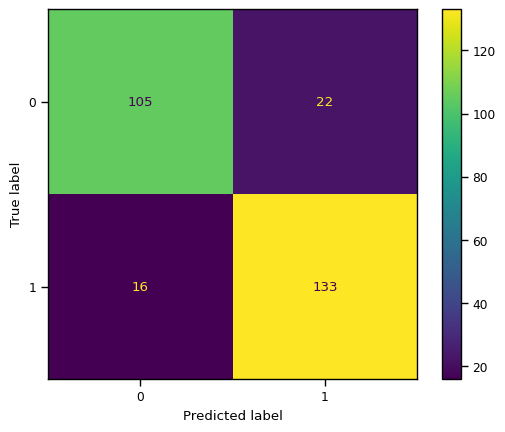

In [56]:
LR = LogisticRegression()
ML(LR)

In [57]:
#Tuning Logistic Regression
C_param_range = [0.001,0.01,0.1,1,10,100]

logreg_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
logreg_table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:

    # Apply logistic regression model to training data
    lr = LogisticRegression(C = i,random_state = 0)
    lr.fit(X_train_Scaled,y_train)

    # Predict using model
    y_pred = lr.predict(X_test_Scaled)

    # Saving accuracy score in table
    print(f'Accuracy Score for C = {i} is {accuracy_score(y_test,y_pred)}')
    #j += 1

    # Printing decision regions
    #print(classification_report(y_test, y_pred))

Accuracy Score for C = 0.001 is 0.5398550724637681
Accuracy Score for C = 0.01 is 0.8260869565217391
Accuracy Score for C = 0.1 is 0.8804347826086957
Accuracy Score for C = 1 is 0.8623188405797102
Accuracy Score for C = 10 is 0.8659420289855072
Accuracy Score for C = 100 is 0.8623188405797102


Accuracy score of this model :  0.8804347826086957
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       127
           1       0.87      0.91      0.89       149

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



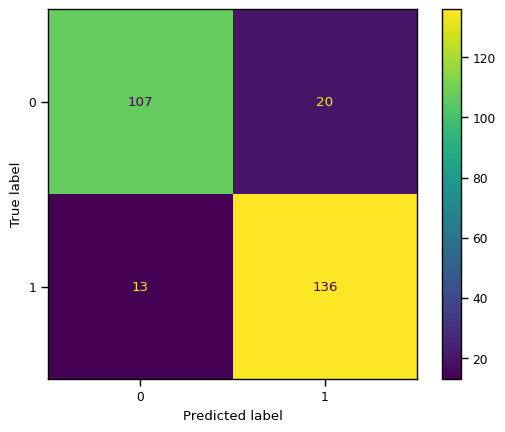

In [58]:
LR2=LogisticRegression(C=0.1,random_state=0)
ML(LR2)

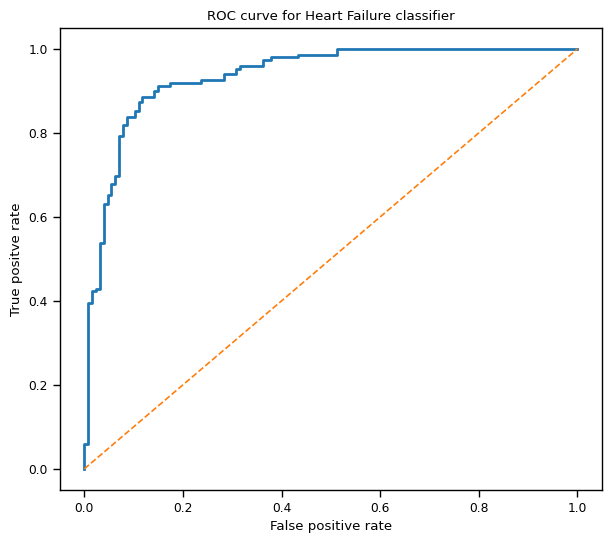

Area under this curve is 0.9364265708397188


In [59]:
AUC_curve(LR2)

# XGBoost (eXtreme Gradient Boosting) Classifier

Accuracy score of this model :  0.8514492753623188
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       127
           1       0.85      0.88      0.86       149

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



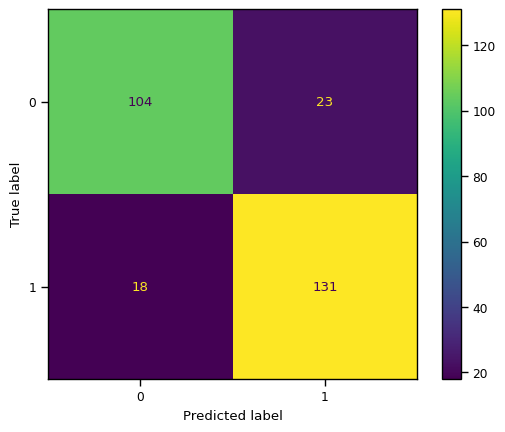

In [60]:
XGB = XGBClassifier()
ML(XGB)

Accuracy score of this model :  0.8985507246376812
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       127
           1       0.89      0.93      0.91       149

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



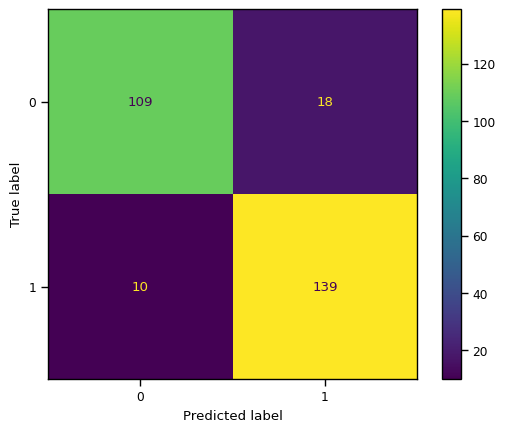

In [61]:
#Tuning XGBoost Classifier
XGB_2 = XGBClassifier(max_depth=3,n_estimators=200,
                     learning_rate=0.05,colsample_bytree=0.6,
                     subsample=0.6)
XGB_2.fit(X_train_Scaled,y_train)

ML(XGB_2)

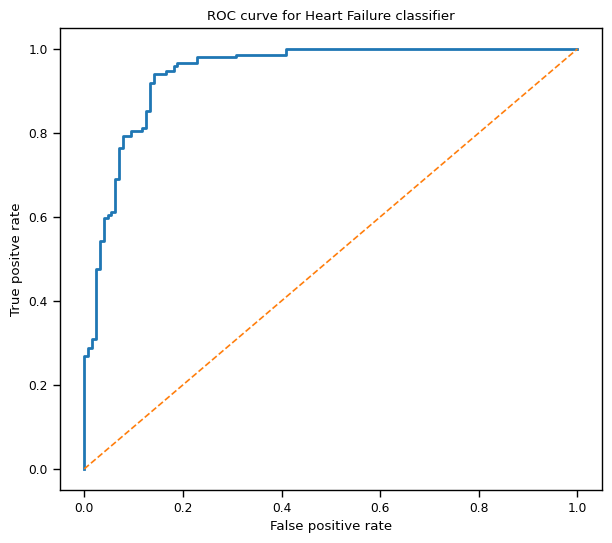

Area under this curve is 0.943824974898272


In [62]:
AUC_curve(XGB_2)

# K-Nearest Neighbors (KNN) classifier

Accuracy score of this model :  0.8586956521739131
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       127
           1       0.85      0.89      0.87       149

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



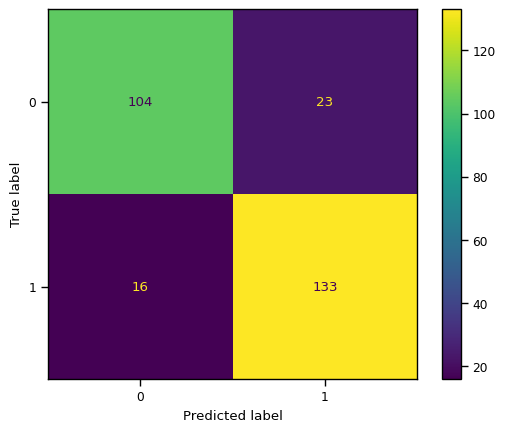

In [63]:
KN = KNeighborsClassifier()
ML(KN)

In [64]:
#importing GridSearchCV for tuning the model
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [66]:
KN2 = GridSearchCV(estimator=KN, param_grid=param_grid, cv=5, scoring='accuracy')

Accuracy score of this model :  0.9094202898550725
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       127
           1       0.90      0.93      0.92       149

    accuracy                           0.91       276
   macro avg       0.91      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276



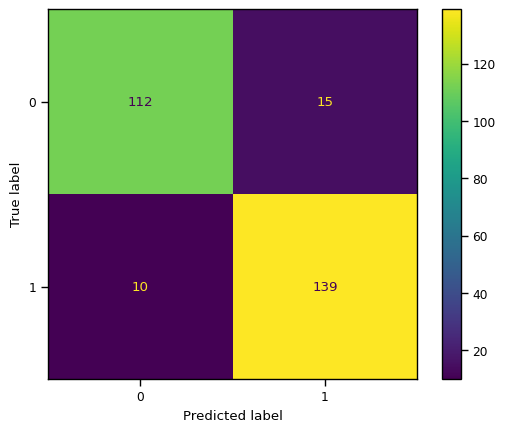

In [67]:
ML(KN2)

In [68]:
print("Best Parameters: ", KN2.best_params_)

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


# Random Forest Classifier

Accuracy score of this model :  0.8804347826086957
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       127
           1       0.87      0.92      0.89       149

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



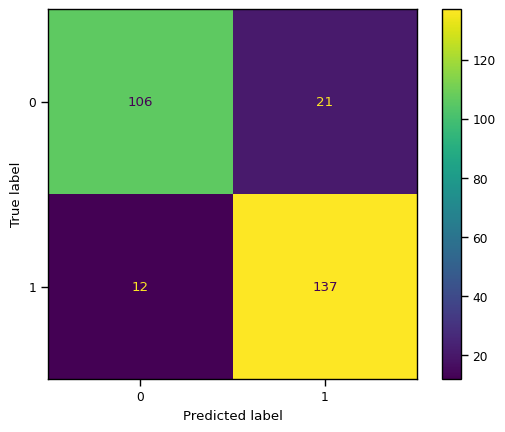

In [69]:
RF = RandomForestClassifier()
ML(RF)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy score of this model :  0.8985507246376812
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       127
           1       0.88      0.94      0.91       149

    accuracy                           0.90       276
   macro avg       0.90      0.89      0.90       276
weighted avg       0.90      0.90      0.90       276



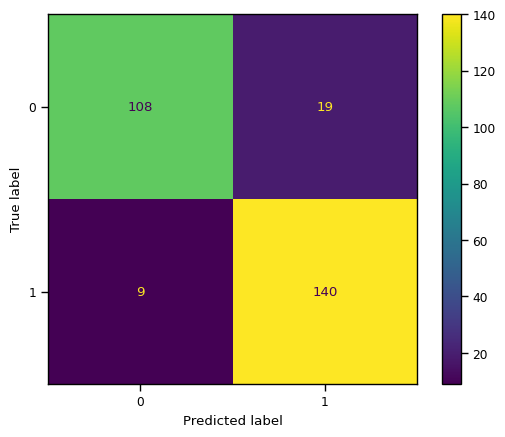

In [80]:
hyperF = dict(
    n_estimators = [1200, 1400, 1600],  # Increase the number of trees
    max_depth = [30, 40, None],          # Try deeper trees and no limit
    min_samples_split = [4, 6, 8],       # Narrow around the best value found
    min_samples_leaf = [1, 2, 3],        # Fine-tune
    max_features = ['sqrt', 'log2', 0.5] # Add max_features to the grid
)

RF2 = GridSearchCV(RF, hyperF, cv = 5, verbose = 1,
                      n_jobs = -1)
ML(RF2)

In [71]:
#the best estimator used to make predictions
#best_rf = RF2.best_estimator_
#best_rf

In [72]:
#AUC_curve(RF2)

#Model App Development

In [73]:
import pickle

In [74]:
# save the model to disk
pickle.dump(KN2, open('desired-model-file-name.pkl', 'wb'))

In [75]:
# load the model from disk
saved_model = pickle.load(open('desired-model-file-name.pkl', 'rb'))
print(saved_model)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


In [76]:
import warnings

In [77]:
warnings.filterwarnings('ignore')

In [78]:
pickle.dump(Scaler, open('scaler.pkl', 'wb'))

In [79]:
import sklearn
print(sklearn.__version__)

1.2.2
